# Lab 15: Zero-shot image classification

In [1]:
from transformers import pipeline

checkpoint = 'openai/clip-vit-large-patch14'
model = pipeline(model=checkpoint, task='zero-shot-image-classification')

c:\users\jeffp\appdata\local\programs\python\python38\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


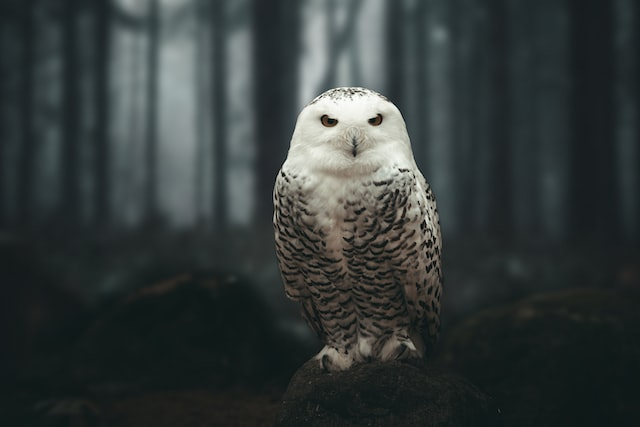

In [2]:
import requests
from PIL import Image

url = 'https://unsplash.com/photos/g8oS8-82DxI/download?ixid=MnwxMjA3fDB8MXx0b3BpY3x8SnBnNktpZGwtSGt8fHx8fDJ8fDE2NzgxMDYwODc&force=true&w=640'
image = Image.open(requests.get(url, stream=True).raw)
display(image)

In [3]:
model(image, candidate_labels=['fox', 'bear', 'seagull', 'owl', 'dog'])

[{'score': 0.9993027448654175, 'label': 'owl'},
 {'score': 0.0005459637613967061, 'label': 'seagull'},
 {'score': 7.576245116069913e-05, 'label': 'fox'},
 {'score': 6.636335456278175e-05, 'label': 'bear'},
 {'score': 9.116615728999022e-06, 'label': 'dog'}]

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images, labels = [], []

    for file in os.listdir(path):
        image = Image.open(os.path.join(path, file))
        images.append(image)
        labels.append(label)

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(images[i]) / 255)

x, y = [], []

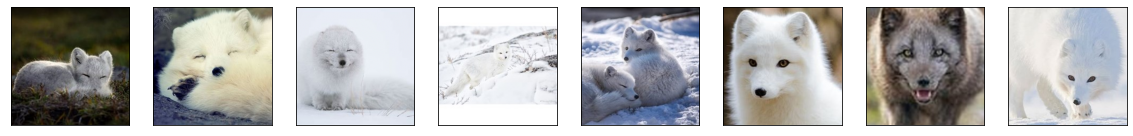

In [5]:
images, labels = load_images_from_path('Wildlife/arctic_fox', 0)
show_images(images)

x += images
y += labels

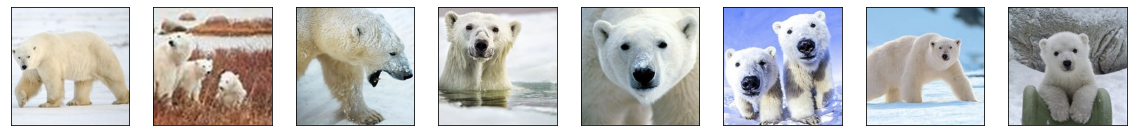

In [6]:
images, labels = load_images_from_path('Wildlife/polar_bear', 1)
show_images(images)

x += images
y += labels

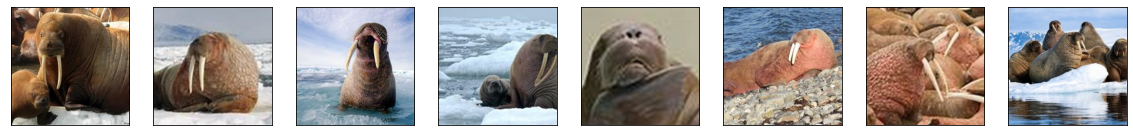

In [7]:
images, labels = load_images_from_path('Wildlife/walrus', 2)
show_images(images)

x += images
y += labels

In [8]:
y_pred = []
class_labels = ['arctic fox', 'polar bear', 'walrus']

for i in range(len(x)):
    result = model(x[i], candidate_labels=class_labels)
    predicted_class = class_labels.index(result[0]['label'])
    score = result[0]['score']
    print(f'{class_labels[y[i]]} -> {class_labels[predicted_class]} ({score:.1%})')
    y_pred.append(predicted_class)

arctic fox -> arctic fox (100.0%)
arctic fox -> arctic fox (99.9%)
arctic fox -> arctic fox (100.0%)
arctic fox -> arctic fox (100.0%)
arctic fox -> arctic fox (99.9%)
arctic fox -> arctic fox (100.0%)
arctic fox -> arctic fox (100.0%)
arctic fox -> arctic fox (99.9%)
arctic fox -> arctic fox (100.0%)
arctic fox -> arctic fox (100.0%)
polar bear -> polar bear (99.9%)
polar bear -> polar bear (98.5%)
polar bear -> polar bear (99.7%)
polar bear -> polar bear (99.9%)
polar bear -> polar bear (99.9%)
polar bear -> polar bear (99.9%)
polar bear -> polar bear (99.9%)
polar bear -> polar bear (99.8%)
polar bear -> polar bear (99.6%)
polar bear -> polar bear (100.0%)
walrus -> walrus (100.0%)
walrus -> walrus (100.0%)
walrus -> walrus (100.0%)
walrus -> walrus (99.9%)
walrus -> walrus (99.9%)
walrus -> walrus (100.0%)
walrus -> walrus (100.0%)
walrus -> walrus (100.0%)
walrus -> walrus (99.9%)
walrus -> walrus (100.0%)


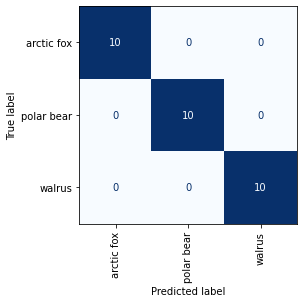

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(False)

cmd.from_predictions(y, y_pred,
                     display_labels=class_labels, colorbar=False,
                     cmap='Blues', xticks_rotation='vertical', ax=ax)